In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (27.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and direc

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [ ]:
df=pd.read_csv("/content/sales_quary3.csv")

In [ ]:
df.head()


,Recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_segment
0,326,1,77183.60,1,1,5,115
1,3,7,4310.00,5,4,4,544
2,76,4,1797.24,3,3,4,334
3,19,1,1757.55,4,1,4,414
4,311,1,334.40,1,1,2,112


In [ ]:
df[['Recency','monetary', 'frequency']].mean()


,0
Recency,93.041484
monetary,2053.793017
frequency,4.271952


# 1. 각 변수 분포 확인을 위한 히스토그램

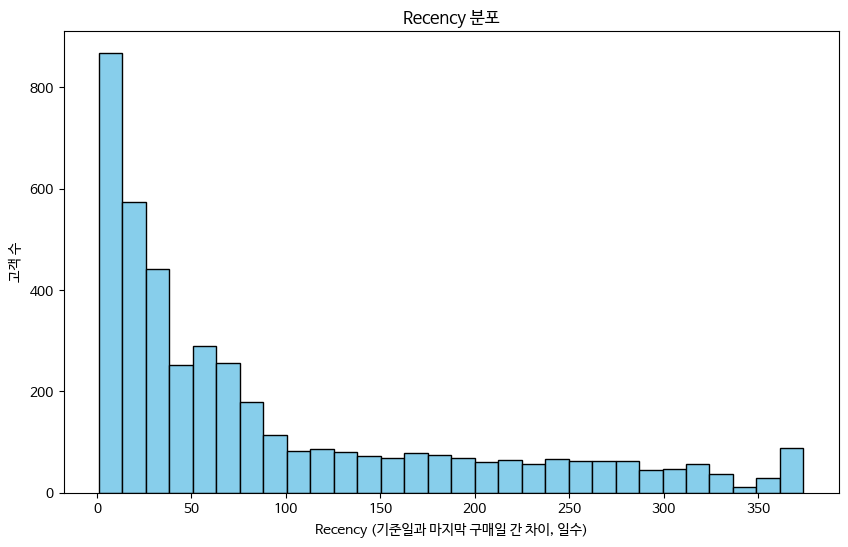

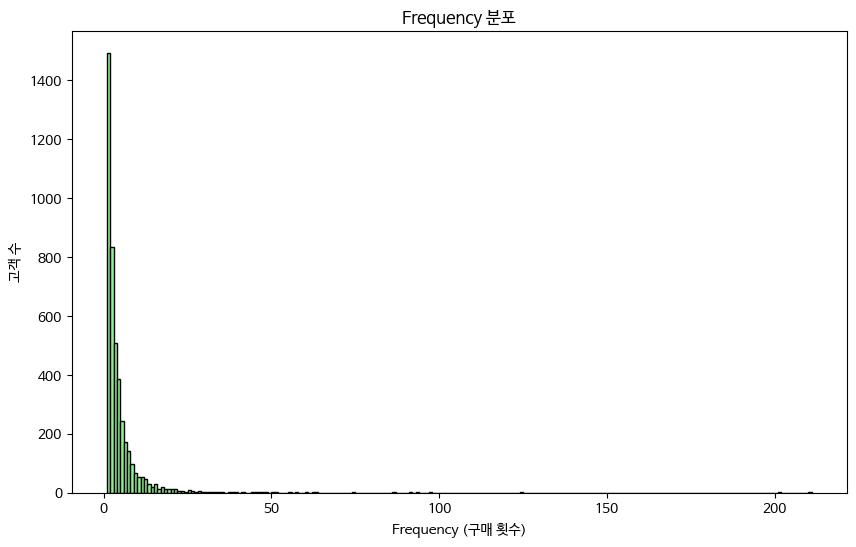

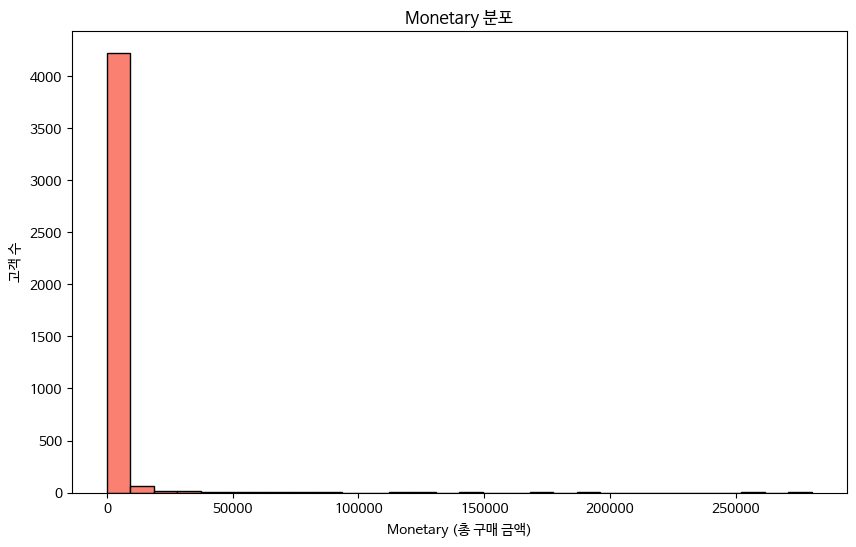

In [ ]:
# (1) Recency (기준일과 마지막 구매일 사이의 일수)
plt.figure(figsize=(10,6))
plt.hist(df["Recency"], bins=30, color='skyblue', edgecolor='k')
plt.title("Recency 분포")
plt.xlabel("Recency (기준일과 마지막 구매일 간 차이, 일수)")
plt.ylabel("고객 수")
plt.show()

# (2) Frequency (구매 횟수)
plt.figure(figsize=(10,6))
# frequency는 정수이므로, 정수 단위 bin을 생성 (최소값부터 최대값까지 +1)
plt.hist(df["frequency"], bins=range(int(df["frequency"].min()), int(df["frequency"].max())+2), color='lightgreen', edgecolor='k')
plt.title("Frequency 분포")
plt.xlabel("Frequency (구매 횟수)")
plt.ylabel("고객 수")
plt.show()

# (3) Monetary (총 구매 금액)
plt.figure(figsize=(10,6))
plt.hist(df["monetary"], bins=30, color='salmon', edgecolor='k')
plt.title("Monetary 분포")
plt.xlabel("Monetary (총 구매 금액)")
plt.ylabel("고객 수")
plt.show()



*   R : 0~10일 정도로 매우 낮은 구간에 가장 많은 고객이 몰려 있고, 그 뒤로 일수가 커질수록 고객 수가 급격히 감소하며 긴 꼬리 형태로 이어지는 분포
*   F : 대부분의 고객이 1~2회 정도의 구매에서 머무르고, 극히 일부 고객만이 10회 이상 또는 50회 이상 구매하는 식으로 극단적인 편중
*   M : 대부분의 고객이 0에 가까운 매우 낮은 구매 금액에 몰려있음


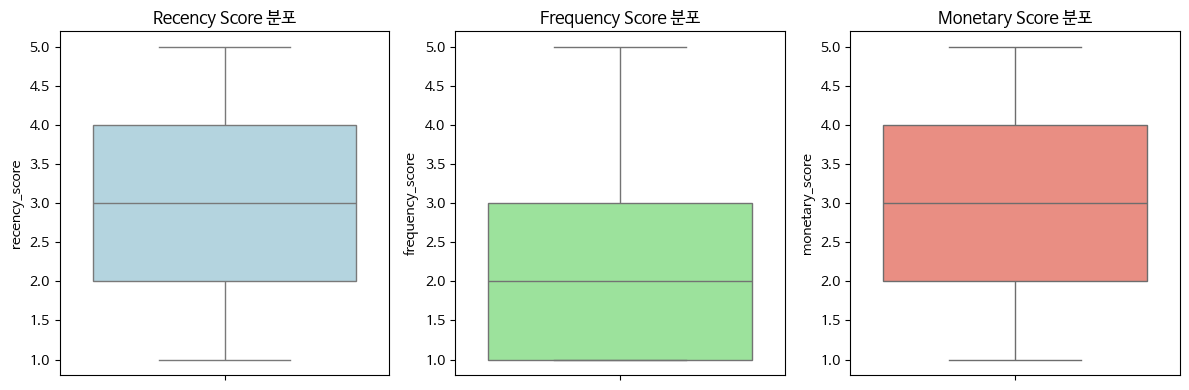

In [ ]:
# 각 RFM 점수의 분포를 박스플롯으로 확인하여 이상치나 분포의 특징 파악
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y="recency_score", color='lightblue')
plt.title("Recency Score 분포")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y="frequency_score", color='lightgreen')
plt.title("Frequency Score 분포")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y="monetary_score", color='salmon')
plt.title("Monetary Score 분포")

plt.tight_layout()
plt.show()

# 2. 구매 횟수와 구매 금액 간 관계: 산점도

구매 횟수가 많을수록 총 구매 금액도 증가하는가?

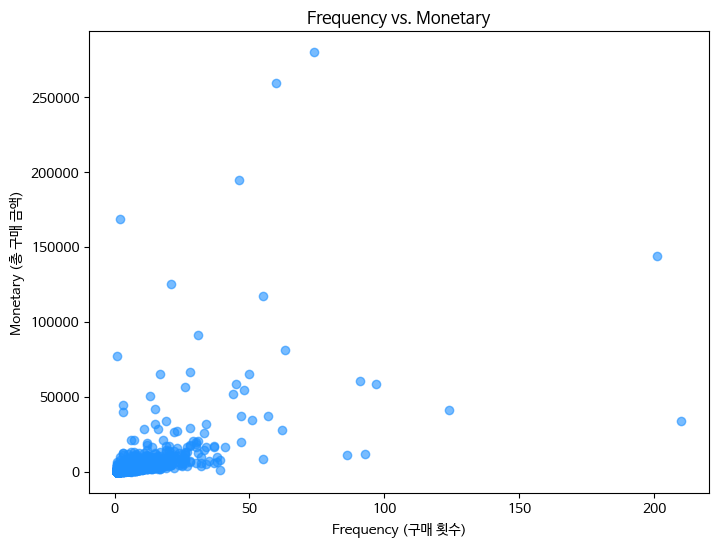

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["frequency"], df["monetary"], color='dodgerblue', alpha=0.6)
plt.title("Frequency vs. Monetary")
plt.xlabel("Frequency (구매 횟수)")
plt.ylabel("Monetary (총 구매 금액)")
plt.show()

고객 대부분이 적은 횟수의 구매와 낮은 총 구매 금액

# 3. RFM Segment 분포: 바 차트

In [ ]:
# rfm_segment별 빈도수 계산
pd.set_option('display.max_rows', None)

rfm_counts = df['rfm_segment'].value_counts().sort_index()

distribution_table = pd.DataFrame({
    'RFM_Segment': rfm_counts.index,
    'Count': rfm_counts.values
})

distribution_table

,RFM_Segment,Count
0,111,114
1,112,186
2,113,61
3,114,6
4,115,1
5,121,5
6,122,22
7,123,26
8,124,5
9,132,3


In [ ]:
all_segments = [''.join(x) for x in itertools.product('12345', repeat=3)]
df_all = pd.DataFrame({'RFM_Segment': all_segments})

complete_distribution = df_all.merge(distribution_table, on='RFM_Segment', how='left')

complete_distribution['Count'] = complete_distribution['Count'].fillna(0).astype(int)

complete_distribution = complete_distribution.sort_values('RFM_Segment').reset_index(drop=True)

complete_distribution

,RFM_Segment,Count
0,111,114
1,112,186
2,113,61
3,114,6
4,115,1
5,121,5
6,122,22
7,123,26
8,124,5
9,125,0


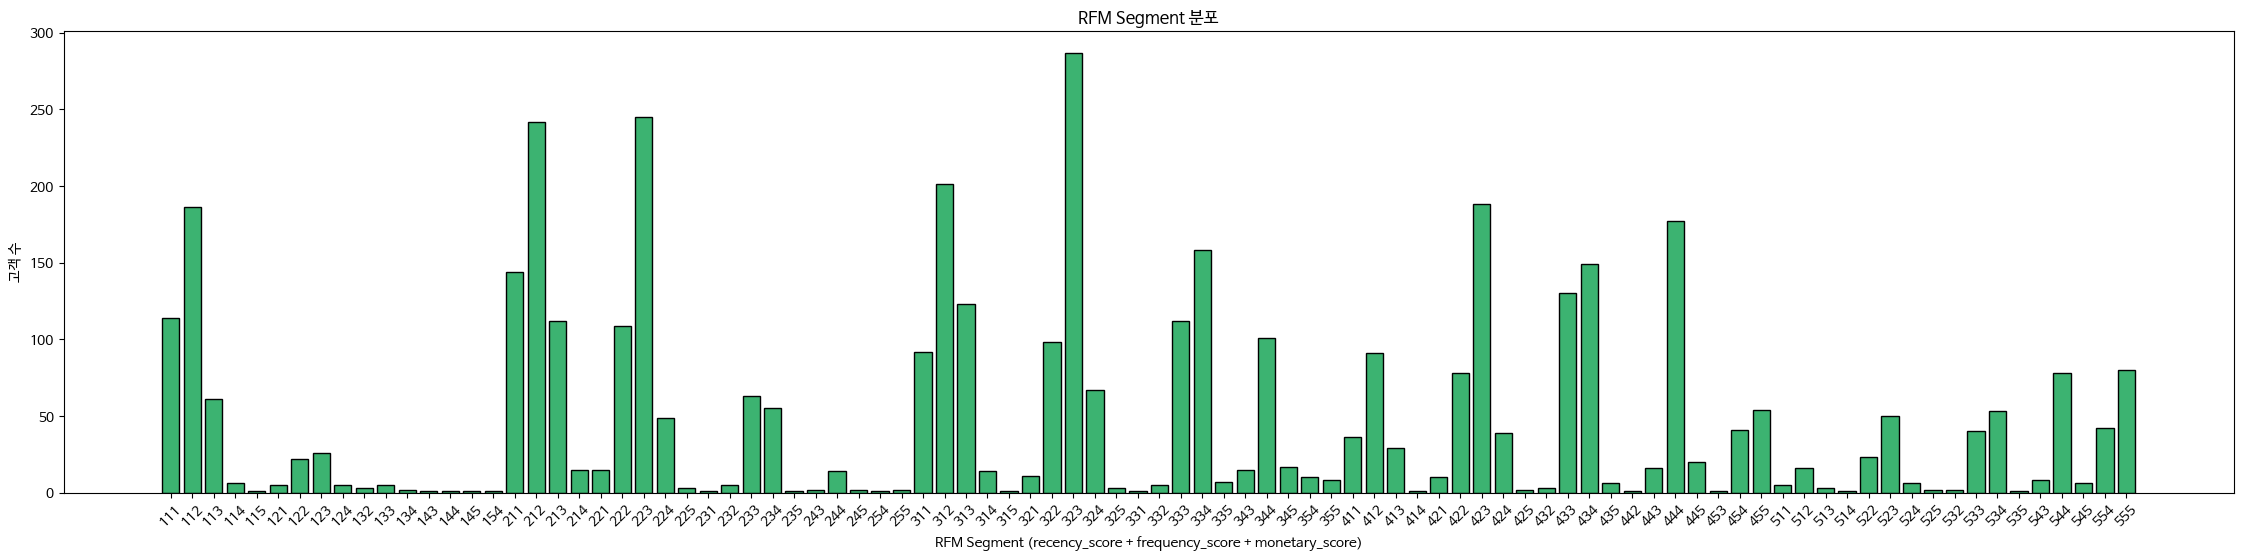

In [ ]:
df['rfm_segment'] = df['rfm_segment'].astype(str)
rfm_counts = df["rfm_segment"].value_counts().sort_index()

plt.figure(figsize=(28,6))
plt.bar(rfm_counts.index, rfm_counts.values, color='mediumseagreen', edgecolor='k')
plt.title("RFM Segment 분포")
plt.xlabel("RFM Segment (recency_score + frequency_score + monetary_score)")
plt.ylabel("고객 수")
plt.xticks(rotation=45)
plt.show()

 * 각 세그먼트별로 마케팅·CRM 전략을 달리 적용
 * 많이 차지하는 세그먼트와 VIP(고점수)·이탈위험(저점수) 세그먼트에 대한 우선순위 관리가 중요

# 4. R, F, M 점수 간 상관관계: 히트맵

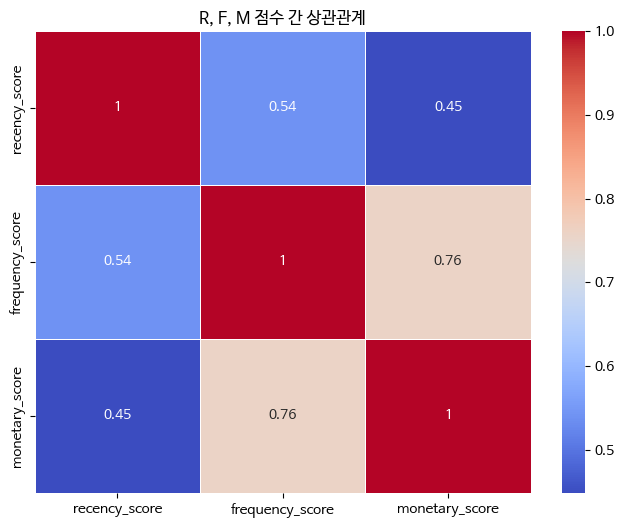

In [ ]:
plt.figure(figsize=(8,6))
corr = df[["recency_score", "frequency_score", "monetary_score"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("R, F, M 점수 간 상관관계")
plt.show()

#인사이트



1.   각 변수 분포 확인을 위한 히스토그램

*  R

 *   최근에 구매한 고객이 많음(cross-sel이나 추가구매 유도 전략을 사용하기에 좋은 대상)
 * 오른쪽으로 갈수록  소수지만 일정한 고객이 분포(휴면 고객 관리 전략이 필요)
* F
 * 대다수 고객은 단발성 구매
 * 오른쪽 꼬리 부분에 소수지만 가장 충성도 높은 VIP 고객(매출에 큰 기여를 하고 있을 가능성이 큼)

*   M
 * 소액 구매 고객이 대다수
 * 소수의 고객만이 상대적으로 큰 금액을 소비



2.  구매 횟수와 구매 금액 간 관계: 산점도


* 전반적으로 구매 횟수가 늘어날수록 총 구매 금액도 증가하는 양상
* 다양한 예외(빈도 대비 고액, 혹은 금액 대비 고빈도 등)가 존재

3. RFM Segment 분포: 바 차트

* 활성 우량 고객 (ex: 555, 455, 445 등):
  * 최근에 활발하게 구매하면서도 빈도와 지출 모두 높은 핵심 고객층

* 중간 활성 고객 (ex: 323, 334, 423 등):
  * 최근 구매 이력이 비교적 중간인 반면, 구매 빈도는 낮은 편

* 휴면 고객 (ex: 111, 112, 155 등):
  * 한동안 구매가 없었던 휴면 고객

* 존재하지 않는 세그먼트(ex: 515. 531 등):
  * 해당 고객 행동 패턴(예: 아주 최근에 구매했으면서도 빈도는 매우 낮고, 한 번 구매 시 매우 큰 금액을 소비한 경우)이 드물거나 없음을 시사

4. R, F, M 점수 간 상관관계: 히트맵

* Frequency와 Monetary 간의 상관이 가장 높음 (0.76)

  * 구매 횟수가 많은 고객일수록 총 구매 금액도 큰 경향
  * 반복적으로 구매하는 고객은 한 번 구매할 때도 상대적으로 더 많이 지출하거나, 여러 번 구매를 합산했을 때 높은 금액을 형성

* Recency와 Frequency, Recency와 Monetary 간에는 중간 수준의 양의 상관 (0.54, 0.45)

  * 최근에 구매한 고객이 구매 빈도도 높고, 총 지출도 높을 가능성이 있음을 시사(그러나 최근에 구매했다고 해서 반드시 높은 빈도·금액으로 이어지지는 않음)




# Action Plan

**Recency 관점**

1. 최근 구매 고객(Recency 점수 4~5):

 * 브랜드 관심도가 높으므로, 신제품 런칭 소식이나 이벤트 정보를 빠르게 제공
 * 최근에 구매하신 상품과 잘 어울리는 추천 상품, 장바구니에 함께 담으면 할인
 * 구매 후 만족도 조사, 후기 작성 유도, VIP 전용 혜택(멤버십 포인트, 쿠폰)

2. 장기 미구매 고객(Recency 점수 1~2):
 * 고객이 왜 멀어졌는지(가격, 상품, 경쟁사, 불만족 경험 등)를 파악하고 개선책 마련

 * 오랜만에 돌아오신 고객을 위한 특별 쿠폰, 장바구니 리마인드

 * 일정 기간 이상 구매가 없는 고객에게 이메일/문자 알림, “놓치고 계신 혜택” 강조

**Frequency 관점**

1. 구매 횟수가 많은 VIP(점수 4~5):
 * 브랜드 로열티가 높으므로, 추천 보상 제도를 통해 추가 고객 유입을 기대

 * 포인트 적립률 상향, VIP 전용 CS 라인, 생일/기념일 쿠폰

 * 최다 구매 고객 초청 행사, VIP 한정 상품 선구매 기회


2. 구매 횟수가 적은 고객(점수 1~2):

 * 첫 구매 감사 쿠폰, 2회 구매 시 추가 적립 혜택

 * 배송비, 반품 정책, 결제 방식 등을 간소화하여 재구매 부담 완화

 * 소모성 상품(예: 화장품, 식료품)일 경우, 재구매 주기를 예측해 알림 전송


 **Monetary 관점**
1. 고액 구매 고객(점수 4~5):

  * 프리미엄 서비스(무료 선물 포장, 우선 배송, 프라이빗 쇼핑 이벤트 초청)

  * 추가 업셀링 기회(지불 의사가 높으므로, 연관 상품이나 상위 모델을 제안)

  * 리뷰/후기 요청(고액 상품 구매 후 사용 후기를 유도하여 다른 고객에게 신뢰도 제공)

2. 저액 구매 고객(점수 1~2):

  * 소액이라도 반복 구매를 촉진(소액 상품 묶음 할인, 정기 구독 모델 제안(소액 자동 결제))

  * 가치 제안 재정비(본사의 제품/서비스가 더 나은 선택인지를 강조해 구매 단가 상승 유도)

  * 할인/쿠폰 전략(큰 부담 없는 가격대로 진입 장벽을 낮추고, 점차 구매 단가를 높이는 유도)

**RFM 세그먼트별**
1. **111, 112 등** (낮은 R, 낮은 F, 낮은 M)

  * 휴면 고객 재활성화: 강력한 인센티브(예: 복귀 쿠폰, 무료 배송) 제공

  * 왜 이탈했는지 파악: 만족도 조사, 서비스 개선

2. **155 등** (오래 전에 구매했지만, 과거 빈도와 금액이 높았음 → 이탈 VIP)

  * VIP 복귀 캠페인: “다시 오시면 VIP 혜택 복원” 등의 맞춤형 메시지
  * 개인화된 오퍼: 과거 구매 이력 분석 후 유사/보완 상품 제안

3. **555, 455 등** (최근 + 빈도 높음 + 지출액 큼 → 최우수 VIP)

 * 최상위 로열티 프로그램: 포인트/등급 혜택 극대화, 전담 고객매니저 운영

 * 프리미엄 경험 제공: 초청 이벤트, 제한판 상품, 생일/기념일 특별 선물

4. **515 등** (최근에 구매했지만 빈도는 적고 금액은 큼)

 * 추가 구매 횟수 확대: 연관 상품 제안, 정기 구매 유도
 * 고급스러운 브랜드 경험: 가끔이지만 지출 여력이 큰 고객이므로 브랜드 가치 전달에 집중

5. **323, 334, 423 등** (비교적 최근 구매 이력이 있으나 → 구매 빈도와 소비가 중간인 고객)
 * 추가 인센티브를 통해 더 높은 가치 고객으로 전환
 * 리워드 프로그램, 포인트 적립, 맞춤 추천 등이 효과적일 수 있습니다.



**상관관계와 점수별 특성 반영(Frequency와 Monetary 간 상관이 가장 높음)**

 * 구매 횟수를 늘리면 자연스럽게 총 구매 금액도 상승할 가능성이 큼 → **재구매 유도**에 집중(리워드 프로그램, 적립, 쿠폰 등)

 * 최근에 구매했더라도 빈도나 금액이 높지 않을 수 있으므로, “최근 구매 고객” 중에서도 점수별로 세분화하여 관리

 * 단순히 “최근 구매 고객”을 우수 고객으로 단정 짓기보다는, Frequency·Monetary 지표도 함께 고려

 *  점수별로 독립적인 지표로 봐야 함(Recency=5라도 Frequency=1, Monetary=5라면 “최근에 한 번, 크게 구매”한 고객이므로, 빈도 증대를 위한 전략이 필요)




